# Deep learning, but not understanding

CAP 6635 Artifical Intelligence Spring 2021
Christian Garbin

In the book "Artifical Intelligence, a giude for thinking humans" (Melanie Mitchell) _____________

TODO

the code is based on the [TensorFlow classification tutorial](https://www.tensorflow.org/tutorials/keras/classification) and the [TensorFlow CNN classification tutorial](https://www.tensorflow.org/tutorials/images/cnn).

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import images

%matplotlib inline

To increase reproducibility (although it's not guaranteed).

In [2]:
# Based on https://stackoverflow.com/a/52897216
seed_value = 0
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

In [3]:
images.create_datasets()
(train_set, train_label), (test_set, test_label) = images.get_upright_dataset(10)
class_names = images.get_class_labels()

In [4]:
# Normalize a set and its labels
def normalize_set(set, labels=None):
    # Normalize the pixel value ranges to improve training
    set = set / 255.0
    # Reshape to match the network inoput layer shape
    set = np.reshape(set,
                    (-1, images.CANVAS_SIZE, images.CANVAS_SIZE, 1))

    if labels is not None:
        labels = np.reshape(labels, (-1, 1))
        
    return set, labels

In [5]:
train_set, train_label = normalize_set(train_set, train_label)
test_set, test_label = normalize_set(test_set, test_label)

In [6]:
print(train_set.shape, train_set.dtype, train_label.shape, train_label.dtype)
print(test_set.shape, test_set.dtype, test_label.shape, test_label.dtype)

(614, 64, 64, 1) float64 (614, 1) uint8
(67, 64, 64, 1) float64 (67, 1) uint8


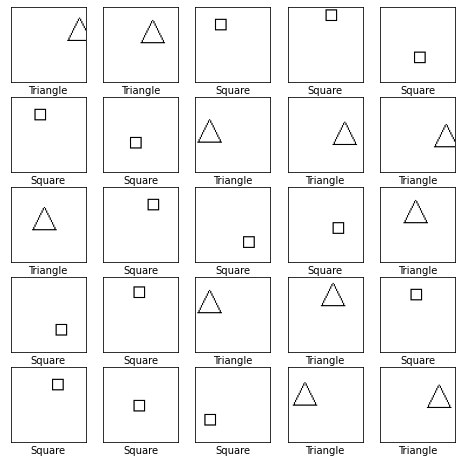

In [7]:
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_set[i], cmap='gray')
    plt.xlabel(class_names[train_label[i][0]])
plt.show()

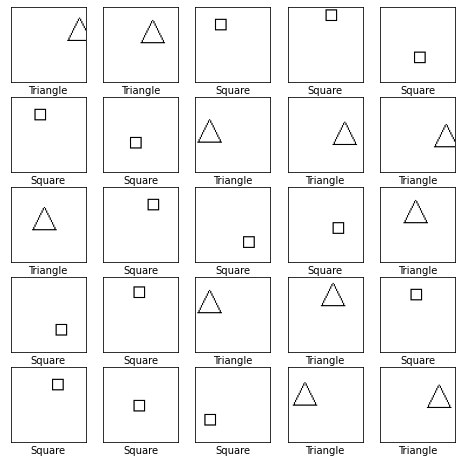

In [8]:
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_set[i], cmap='gray')
    plt.xlabel(class_names[train_label[i][0]])
plt.show()

In [9]:
INPUT_SHAPE = (images.CANVAS_SIZE, images.CANVAS_SIZE, 1)
ACTIVATION = 'relu'
NUM_CLASSES=2

def get_model():
    """Return a compiled model, ready to be trained."""
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, (3, 3), activation=ACTIVATION,
                               input_shape=INPUT_SHAPE),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation=ACTIVATION),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(32, activation=ACTIVATION),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax'),
    ])
    
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
    return model


In [10]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=2, verbose=1,
    restore_best_weights=True)

In [11]:
model = get_model()
model.fit(train_set, train_label, batch_size=32, epochs=3, 
          validation_data=(test_set, test_label), callbacks=[callback])

Epoch 1/3
20/20 [==============================] - 3s 146ms/step - loss: 0.7254 - accuracy: 0.5447 - val_loss: 0.6206 - val_accuracy: 0.6567
Epoch 2/3
20/20 [==============================] - 3s 129ms/step - loss: 0.5638 - accuracy: 0.6342 - val_loss: 0.4602 - val_accuracy: 0.7313
Epoch 3/3
20/20 [==============================] - 3s 132ms/step - loss: 0.4071 - accuracy: 0.8602 - val_loss: 0.1575 - val_accuracy: 0.9851


In [12]:
pred_prob = model.predict(test_set)
pred_label = np.argmax(pred_prob, axis=1)

In [13]:
print(pred_label)
print(len(pred_label))

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
67


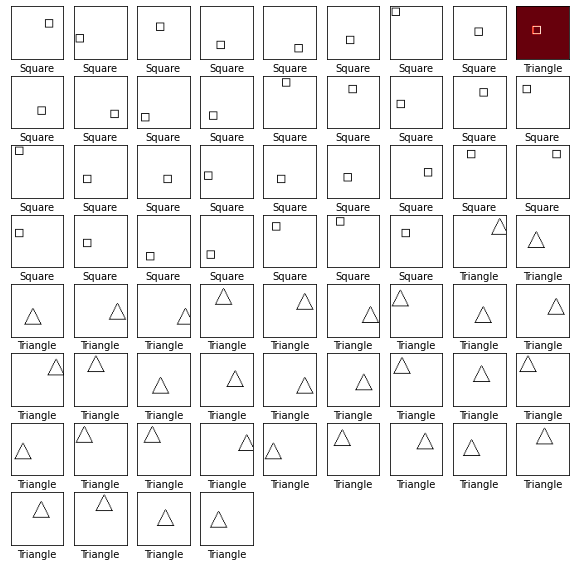

In [14]:
plt.figure(figsize=(10,10))
for i in range(67):
    plt.subplot(8,9,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    cmap = 'gray' if pred_label[i] == test_label[i][0] else 'Reds'
    plt.imshow(test_set[i], cmap=cmap)
    plt.xlabel(class_names[pred_label[i]])
plt.show()

In [15]:
rotated_squares = images.get_square_rotated_dataset()
rotated_squares, _ = normalize_set(rotated_squares)

In [16]:
pred_prob = model.predict(rotated_squares)
pred_label = np.argmax(pred_prob, axis=1)

In [17]:
print(pred_label)
print(len(pred_label))

[1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 0 1 0]
88


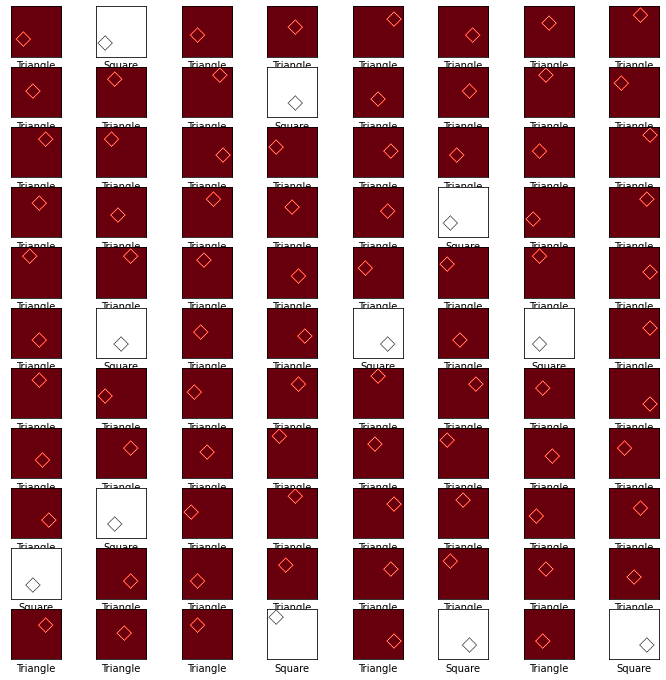

In [18]:
plt.figure(figsize=(12,12))
for i in range(88):
    plt.subplot(11,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    cmap = 'gray' if pred_label[i] == 0 else 'Reds'
    plt.imshow(rotated_squares[i], cmap=cmap)
    plt.xlabel(class_names[pred_label[i]])
plt.show()